# Tugas Besar: Deteksi Covid-19 pada Gambar CXR

## Motivation

### Problem
Penanganan Covid-19 sampai saat ini masih sangat bergantung pada metode PCR (Polymerase Chain Reaction) untuk mendeteksi adanya virus Sars-Cov-2 pada manusia. Metode PCR ini sudah teruji mampu memberikan hasil yang paling baik dibandingkan dengan metode-metode lainnya. Namun metode ini juga memiliki kelemahan karena prosesnya yang cukup lama, yaitu butuh 3-7 hari hingga hasil tes keluar. Padahal seseorang yang telah terinfeksi Covid-19 sangat berpotensi menularkan virus ini ke orang lain, tenaga medis sangat butuh untuk memberikan keputusan diagnosa dalam waktu cepat. Selain itu telah terbukti adanya false negative pada metode PCR yang terjadi saat PCR digunakan pada tahap awal infeksi. Perilaku dari virus Sars-Cov-2 yang masih baru ini masih menimbulkan banyak tanda tanya. Metode penanganan yang sepenuhnya berfungsi ternyata masih memiliki kelemahan, karena itu dibutuhkan metode-metode lain yang sifatnya komplementer sehingga dapat mengurangi kemunculan false negative sebanyak-banyaknya.

Covid-19 pada dasarnya adalah salah satu jenis Pneumonia. Pneumonia merupakan infeksi yang menyebabkan peradangan pada kantong udara (alveoli) di paru-paru, sehingga kantong udara terisi oleh cairan dan menyebabkan penderitanya mengalami sesak nafas. Pneumonia bisa disebabkan oleh bakteri, jamur, atau virus yang salah satunya adalah virus Sars-Cov-2. Gambar radiologi (x-ray scan dan ct scan) sudah umum digunakan untuk mendeteksi adanya pneumonia dengan mengamati tanda-tanda pada tampakan radiologis yang disebut dengan infiltrasi/opasiti/konsolidasi. Saat ini pemeriksaan radiologi sudah dijadikan standar untuk memeriksa pasien Covid-19, sebagai komplemen dari PCR dan pemeriksaan klinis lainnya. Pemeriksaan dengan radiologi relatif lebih cepat dari PCR, hasil pemeriksaan bisa didapat dalam waktu 1 hari. Namun sama seperti pengetesan lainnya, metode ini juga memiliki false positive. Terlebih lagi, pembacaan gambar radiologi bersifat operator-dependent, yang artinya setiap dokter spesialis radiologi bisa memberikan rekomendasi diagnosa yang berbeda.

### Solution
Deep Learning untuk klasifikasi Pneumonia (Covid-19) pada gambar radiologi dengan mencari tanda kemunculan infiltrat/opasiti/konsolidasi.

![alt text](https://drive.google.com/uc?id=1kQOINj0U8NY1BNqhSWQU9xqtvLSgYTji)



## **DISCLAIMER**

MODEL AI INI TIDAK DITUJUKAN UNTUK MENJADI SOLUSI ATAS PERMASALAHAN COVID-19 YANG SEDANG TERJADI. YANG TERCANTUM DI SINI DAN YANG ANDA KERJAKAN SELURUHNYA BERADA DALAM KONTEKS KEPENTINGAN AKADEMIK UNTUK MEMAHAMI CARA KERJA SISTEM BERBASIS PEMBELAJARAN MESIN.

Pemanfaatan AI di bidang medis membutuhkan studi yang mendalam dan penuh kehati-hatian, pengembangannya melibatkan pakar-pakar di bidang AI, medis, dan lain-lain. Pada praktiknya, penggunaan AI di bidang medis dibatasi hanya sebagai alat bantu pemeriksaan dan pemberi rekomendasi, bukan alat penentu diagnosis. Keputusan terkait diagnosis terhadap pasien sepenuhnya adalah wewenang tenaga medis yang bersangkutan, sesuai dengan hukum yang berlaku.

## Instruksi Tugas Besar
Didalam notebook ini, seluruh script sudah disediakan sehingga Anda tidak perlu lagi mengerjakan bagian script yang kosong. Sebagai gantinya, anda diminta untuk menjalankan program untuk melakukan training model menggunakan **dataset baru** yang diberikan, melakukan evaluasi, dan membandingkan performa model baru dengan performa model awal. Selama pengerjaan Anda akan diberi petunjuk terkait alur dan instruksi pengerjaan. Oleh karena itu, perhatikan istruksi dengan baik.

>**Note:** Setelah Anda menyelesaikan tugas besar ini, Anda diminta untuk mengumpulkan tugas besar ini dalam bentuk HTML. Sebelum diubah menjadi HTML, semua script harus dipastikan sudah di-run agar penilai dapat melihat hasil dari kode yang dijalankan. Anda dapat mengubah notebook ini menjadi HTML dengan **File -> Download as -> HTML(.html)**. Sertakan file HTML tersebut bersama folder tugas besar ini.

Selain mengimplementasikan bagian script yang kosong, Anda juga diminta menjawab pertanyaan analisis. Pertanyaan tersebut ditandai dengan tulisan **'Pertanyaan X'**. Baca dengan baik pertanyaan tersebut dan berikan jawaban anda secara jelas di bagian dengan tulisan **Jawaban**. Tugas besar Anda akan dinilai berdasarkan 
kode implementasi dan juga jawaban analisis setiap pertanyaan.

>**Note:** Sel Code dan Markdown dapat dieksekusi dengan **Shift+Enter** di keyboard. Sel Markdown dapat di-edit dengan mengklik dua kali sel tersebut.

Bagian yang diberi tanda **_opsional_** merupakan tugas yang diberikan jika Anda ingin mendapatkan nilai lebih dari standar minimum.

## Alur Tugas Besar
Notebook tugas besar ini dibagi menjadi beberapa langkah sebagai berikut. Silahkan diperhatikan dan dipahami alur dan detail setiap langkah.
1. Notebook Setting
2. Environment Setting
3. Dataset Preparation
3. Label Separation
4. Label One-Hot-Encoding
5. Model Definition
6. Hyperparameters
7. Optimizer and Loss Function
8. Model Training
9. Model Evaluation
10. Eksperimen Model Machine Learning Lain(Opsional)
11. Implementasi Model

## Kelompok yang mengerjakan
Silahkan klik dua kali sel ini kemudian isi bagian yang kosong.

**Kelompok:** 2

**Anggota Kelompok:**
1. Hauzan Adi Wafi | 13216001
2. Aditya Febriananda | 13216011
3. Alif Ilham Madani | 13216047
4. M. Fariz Aziz | 13216054
5. Alfie Aulianda | 13216062
6. Alvin Tafarrel | 13216066
7. Muhammad Qadrin Syira | 13216070


## 1. Notebook Setting


Pengaturan notebook ini bertujuan untuk mengatur penggunaan GPU sebagai runtime Notebook. GPU dibutuhkan karena komputasi yang akan kita lakukan cukup besar. Pemrosesan menggunakan CPU akan menghabiskan waktu yang sangat lama.

In [ ]:
# Check for listed GPU

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12278450568981838124
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 15444279305813836445
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 12390217060876772134
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11150479872
locality {
  bus_id: 1
  links {
  }
}
incarnation: 10542244023719339398
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
]


In [ ]:
# Check for selected GPU

!nvidia-smi

Mon May 18 12:27:03 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P0    72W / 149W |    130MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [ ]:
# Mount google drive to our notebook

from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
# Check for tensorflow version

import tensorflow as tf
print(tf.__version__)

2.2.0


## 2. Environment Setting

Pengaturan environment menentukan library apa saja yang digunakan. Ingat selalu untuk mengimport library yang dibutuhkan saja.

In [ ]:
# import dependencies
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2
import os

## 3. Datasets Preparation

Dataset sample yang diberikan sudah terbagi ke dalam 2 folder normal dan covid, masing-masing folder berisi 25 data gambar. Data ini sangat sedikit, tidak bisa merepresentasi kasus yang sebenarnya. Pada praktiknya, data yang dibutuhkan jumlahnya ribuan hingga puluhan ribu untuk masing-masing kelas.

In [ ]:
# initialize path and name for datasets, plot image, and model
dataset = "/content/gdrive/My Drive/Tubes DSKC 2020 - Covid19/dataset_2kelas/"
plot_name = "plot.png"
model_name = "covid19.model"

# initialize data(image) and label from dataset directory
print("[INFO] loading images...")
imagePaths = list(paths.list_images(dataset))
data = []
labels = []

[INFO] loading images...


In [ ]:
print(imagePaths)

['/content/gdrive/My Drive/Tubes DSKC 2020 - Covid19/dataset_2kelas/normal/IM-0285-0001.jpeg', '/content/gdrive/My Drive/Tubes DSKC 2020 - Covid19/dataset_2kelas/normal/IM-0277-0001.jpeg', '/content/gdrive/My Drive/Tubes DSKC 2020 - Covid19/dataset_2kelas/normal/IM-0272-0001.jpeg', '/content/gdrive/My Drive/Tubes DSKC 2020 - Covid19/dataset_2kelas/normal/IM-0282-0001.jpeg', '/content/gdrive/My Drive/Tubes DSKC 2020 - Covid19/dataset_2kelas/normal/IM-0274-0001.jpeg', '/content/gdrive/My Drive/Tubes DSKC 2020 - Covid19/dataset_2kelas/normal/IM-0273-0001.jpeg', '/content/gdrive/My Drive/Tubes DSKC 2020 - Covid19/dataset_2kelas/normal/IM-0276-0001.jpeg', '/content/gdrive/My Drive/Tubes DSKC 2020 - Covid19/dataset_2kelas/normal/IM-0280-0001.jpeg', '/content/gdrive/My Drive/Tubes DSKC 2020 - Covid19/dataset_2kelas/normal/IM-0278-0001.jpeg', '/content/gdrive/My Drive/Tubes DSKC 2020 - Covid19/dataset_2kelas/normal/IM-0270-0001.jpeg', '/content/gdrive/My Drive/Tubes DSKC 2020 - Covid19/dataset

## 4. Label Separation

Untuk setiap gambar, dibuat label yang sesuai dengan kelasnya. Pemberian label dilakukan dengan membaca parent folder dari setiap gambar. Di akhir proses, semua data diubah bentuknya ke dalam NumPy array. Kemudian data dinormalisasi sehingga nilai pixelnya berada di antara 0 dan 1.

In [ ]:
# loop over the image paths, extract data and label, and preprocess image
for imagePath in imagePaths:
	label = imagePath.split(os.path.sep)[-2]
	image = cv2.imread(imagePath)
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	image = cv2.resize(image, (224, 224))
	data.append(image)
	labels.append(label)
 
# convert to NumPy arrays and normalize to the range [0, 1]
data = np.array(data) / 255.0
labels = np.array(labels)

In [ ]:
# just a sanity check, as usual

print(len(data))
print(len(labels))
#print(data)
print(labels)

1486
1486
['normal' 'normal' 'normal' ... 'COVID-19' 'COVID-19' 'COVID-19']


## 5. One-hot Encoding and Data Augmentation

Dalam keras, data label perlu diolah menjadi matriks yang tiap baris berupa vektor nilai nol atau satu. Data label tersebut perlu dioleh dengan metode One-Hot-Encoding.

Proses selanjutnya adalah data augmentasi.


**Pertanyaan 1**: Apa itu data augmentasi dan apa pengaruhnya pada performa model? Jelaskan juga mengapa data augmentation pada poin 9 hanya dilakukan untuk data train?

**Jawaban:** Augmentasi data merupakan teknik yang digunakan untuk mendapatkan dataset yang lebih banyak dengan memanipulasi dataset yang ada. Proses manipulasi dapat dilakukan dengan rotasi, flip, zoom-in, crop, dan lain-lain pada gambar pada dataset yang dimiliki. Intinya adalah proses manipulasi tadi tidak mengubah esensi dari gambar.
Augmentasi dapat meningkatkan akurasi dari model yang dilatih karena kita dapat mendapatkan data train tambahan yang berguna untuk meningkatkan generalisasi pada model.

Alasan augmentasi dilakukan hanya pada data train saja adalah karena kita ingin mendapatkan data train yang lebih banyaksehingga dapat menghasilkan model dan akurasi yang lebih baik. Sementara data test dibutuhkan untuk melakukan evaluasi terhadap model.

...

In [ ]:
# one-hot encoding on the labels
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
print(labels)
labels = to_categorical(labels)

# split dataset to train and test data
(trainX, testX, trainY, testY) = train_test_split(data, labels,
	test_size=0.20, stratify=labels, random_state=0)

# initialize data augmentation
trainAug = ImageDataGenerator(
	rotation_range=15,
	fill_mode="nearest")

[[1]
 [1]
 [1]
 ...
 [0]
 [0]
 [0]]


In [ ]:
# sanity check, again

print(labels)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


## 6. Model Definition

Arsitektur yang digunakan pada tugas ini adalah VGG16 dengan menggunakan pretrained model yang sudah ditraining menggunakan dataset Imagenet. Ini adalah metode yang dinamakan transfer learning, menggunakan pengetahuan yang telah didapat dari model lain untuk memperkuat model yang baru.

In [ ]:
# load the VGG16 pretrained model
baseModel = VGG16(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))

# construct the new head of the model
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.1)(headModel)
headModel = Dense(16, activation="relu")(headModel)
headModel = Dense(2, activation="softmax")(headModel)

# place the new head model on top of the base model
model = Model(inputs=baseModel.input, outputs=headModel)

# freeze the base model
for layer in baseModel.layers:
	layer.trainable = False

In [ ]:
model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

## 7. Hyperparameter


Hyperparameters merupakan nilai-nilai yang perlu ditentukan agar kita dapat memeroleh hasil training yang baik. Dalam hal ini, perlu ditentukan nilai learning rate, ukuran batch dan jumlah iterasi epoch. Anda tidak diwajibkan melakukan fine tuning terhadap hyperparameter ini, namun memilih hyperparameter yang lebih baik dapat meningkatkan performa model dengan signifikan.

In [ ]:
# initialize learning rate, epochs, and batch size
INIT_LR = 1e-3
EPOCHS = 15
BS = 32

## 8. Optimizer and Loss Function

Optimizer merupakan opsi yang juga perlu diperhatikan, pilihan optimizer dalam Keras dapat dilihat [keras-optimizers](https://keras.io/optimizers/). Selain itu, loss function juga perlu dipilih yang disesuaikan dengan jenis data yang digunakan. Dalam Keras jenis-jenis loss function dapat dilihat di [keras-losses](https://keras.io/losses/).

**Pertanyaan 2**: Optimizer di sini menggunakan ADAM, apa bedanya ADAM dengan GD yang sudah dipelajari di kelas? Apakah ada baiknya kita mengganti optimizer ini dengan optimizer yang lain?

**Jawaban:** (silahkan klik dua kali cell ini)

...

In [ ]:
# compile model
print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])

[INFO] compiling model...


## 9. Model Training

Pada tahap ini. kita menggabungkan semua data dan parameter yang telah didefiniska di atas, kemudian melakukan training model.

In [ ]:
# train model
print("[INFO] training head...")
H = model.fit_generator(
	trainAug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=EPOCHS)

[INFO] training head...
Epoch 1/15
37/37 [==============================] - 20s 543ms/step - loss: 0.3923 - accuracy: 0.8378 - val_loss: 0.1922 - val_accuracy: 0.9497
Epoch 2/15
37/37 [==============================] - 20s 540ms/step - loss: 0.1523 - accuracy: 0.9516 - val_loss: 0.0839 - val_accuracy: 0.9799
Epoch 3/15
37/37 [==============================] - 20s 537ms/step - loss: 0.1150 - accuracy: 0.9602 - val_loss: 0.0703 - val_accuracy: 0.9866
Epoch 4/15
37/37 [==============================] - 20s 532ms/step - loss: 0.0767 - accuracy: 0.9732 - val_loss: 0.0563 - val_accuracy: 0.9899
Epoch 5/15
37/37 [==============================] - 20s 530ms/step - loss: 0.0611 - accuracy: 0.9836 - val_loss: 0.0432 - val_accuracy: 0.9933
Epoch 6/15
37/37 [==============================] - 20s 528ms/step - loss: 0.0536 - accuracy: 0.9853 - val_loss: 0.0375 - val_accuracy: 0.9933
Epoch 7/15
37/37 [==============================] - 20s 531ms/step - loss: 0.0423 - accuracy: 0.9879 - val_loss: 0.041

In [ ]:
!nvidia-smi

Mon May 18 13:25:04 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   72C    P0    78W / 149W |   8551MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

## 10. Model Evaluation

Berikut adalah script yang dapat digunakan untuk menguji model dengan dataset test. Dilakukan perhitungan berupa Confusion Matrix, Accuracy, Sensivity, dan Specificity.

**Pertanyaan 3**: Jelaskan penggunaan keempat metric di atas untuk mengukur performa model ini. Apakah keempat metric tersebut sudah representatif? Adakan metode lain yang lebih baik?

**Jawaban**: Confusion Matrix tabel 2x2 yang berisi empat hasil yang dihasilkan oleh pengklasifikasi biner. Berbagai ukuran, seperti error-rate, accuracy, specificity, sensitivity, dan precision, dapat diturunkan atau berasal dari confusion matrix. Matrix ini terbentuk dari empat hasil yang dihasilkan sebagai hasil klasifikasi biner. Pengklasifikasi biner memprediksi semua instance data dari dataset uji sebagai positif atau negatif. Klasifikasi ini (atau prediksi) menghasilkan empat hasil sebagai berikut:

True positive (TP): mengoreksi prediksi positif

False positive (FP): prediksi positif salah

True negative (TN): mengoreksi prediksi negatif

False negative (FN): prediksi negatif salah

Accuracy dihitung sebagai jumlah semua prediksi yang benar dibagi dengan jumlah total dataset. 

   ACC = (TP + TN)/(TP + TN + FP + FN)

Sensitivity dihitung sebagai jumlah prediksi positif yang benar dibagi dengan jumlah total positif.

   SN = TP/(TP + FN)			--- True Positive, untuk menentukan jumlah prediksi yang benar-benar positif

Specificity dihitung sebagai jumlah prediksi negatif yang benar dibagi dengan jumlah total negatif

   SP = TN/(TN + FP)			--- True Negative, untuk menentukan jumlah prediksi yang benar-benar negatif

Berdasarkan hasil diskusi, menurut kami keempat metric tersebut sudah cukup mewakili hasil program tetapi masih bisa diperbagus atau ditambahkan metric lain seperti Error-Rate dan Precision untuk menampilkan hasil representatif data yang lebih detail.

In [ ]:
# predict data test
print("[INFO] evaluating network...")
predIdxs = model.predict(testX, batch_size=BS)
predIdxs = np.argmax(predIdxs, axis=1)
print(classification_report(testY.argmax(axis=1), predIdxs,
	target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

    COVID-19       0.99      0.99      0.99       149
      normal       0.99      0.99      0.99       149

    accuracy                           0.99       298
   macro avg       0.99      0.99      0.99       298
weighted avg       0.99      0.99      0.99       298



In [ ]:
# compute the confusion matrix, accuracy, sensitivity, and specificity

cm = confusion_matrix(testY.argmax(axis=1), predIdxs)
total = sum(sum(cm))
print(cm)

acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
#errorRate = (cm[0, 1] + cm[1, 0]) / total
#precision = cm[0, 0] / (cm[0, 0] + cm[1, 0])

print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))
#print("error rate: {:.4f}".format(errorRate))
#print("precision: {:.4f}".format(precision))
'''
overall_accuracy = (cm[0,0] + cm[1,1] + cm[2,2]) / total
precision_class_1 = cm[0,0] / (cm[0,0] + cm[0,1] + cm[0,2])
precision_class_2 = cm[1,1] / (cm[1,0] + cm[1,1] + cm[1,2])
precision_class_3 = cm[2,2] / (cm[2,0] + cm[2,1] + cm[2,2])
sensitivity_class_1 = cm[0,0] / (cm[0,0] + cm[1,0] + cm[2,0])
sensitivity_class_2 = cm[1,1] / (cm[0,1] + cm[1,1] + cm[2,1])
sensitivity_class_3 = cm[2,2] / (cm[0,2] + cm[1,2] + cm[2,2])
specificity_class_1 = (cm[1,1]+cm[1,2]+cm[2,1]+cm[2,2])/(cm[1,1]+cm[1,2]+cm[2,1]+cm[2,2]+cm[0,1]+cm[0,2])
specificity_class_2 = (cm[0,0]+cm[0,2]+cm[2,0]+cm[2,2])/(cm[0,0]+cm[0,2]+cm[2,0]+cm[2,2]+cm[1,0]+cm[1,2])
specificity_class_3 = (cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1]+cm[2,0]+cm[2,1])

print("overall_accuracy: {:.4f}".format(overall_accuracy))
print("precision_class_1: {:.4f}".format(precision_class_1))
print("precision_class_2: {:.4f}".format(precision_class_2))
print("precision_class_3: {:.4f}".format(precision_class_3))
print("sensitivity_class_1: {:.4f}".format(sensitivity_class_1))
print("sensitivity_class_2: {:.4f}".format(sensitivity_class_2))
print("sensitivity_class_3: {:.4f}".format(sensitivity_class_3))
print("specificity_class_1: {:.4f}".format(specificity_class_1))
print("specificity_class_2: {:.4f}".format(specificity_class_2))
print("specificity_class_3: {:.4f}".format(specificity_class_3))
'''

[[147   2]
 [  1 148]]
acc: 0.9899
sensitivity: 0.9866
specificity: 0.9933


'\noverall_accuracy = (cm[0,0] + cm[1,1] + cm[2,2]) / total\nprecision_class_1 = cm[0,0] / (cm[0,0] + cm[0,1] + cm[0,2])\nprecision_class_2 = cm[1,1] / (cm[1,0] + cm[1,1] + cm[1,2])\nprecision_class_3 = cm[2,2] / (cm[2,0] + cm[2,1] + cm[2,2])\nsensitivity_class_1 = cm[0,0] / (cm[0,0] + cm[1,0] + cm[2,0])\nsensitivity_class_2 = cm[1,1] / (cm[0,1] + cm[1,1] + cm[2,1])\nsensitivity_class_3 = cm[2,2] / (cm[0,2] + cm[1,2] + cm[2,2])\nspecificity_class_1 = (cm[1,1]+cm[1,2]+cm[2,1]+cm[2,2])/(cm[1,1]+cm[1,2]+cm[2,1]+cm[2,2]+cm[0,1]+cm[0,2])\nspecificity_class_2 = (cm[0,0]+cm[0,2]+cm[2,0]+cm[2,2])/(cm[0,0]+cm[0,2]+cm[2,0]+cm[2,2]+cm[1,0]+cm[1,2])\nspecificity_class_3 = (cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1]+cm[2,0]+cm[2,1])\n\nprint("overall_accuracy: {:.4f}".format(overall_accuracy))\nprint("precision_class_1: {:.4f}".format(precision_class_1))\nprint("precision_class_2: {:.4f}".format(precision_class_2))\nprint("precision_class_3: {:.4f}".format(precision_class_3))

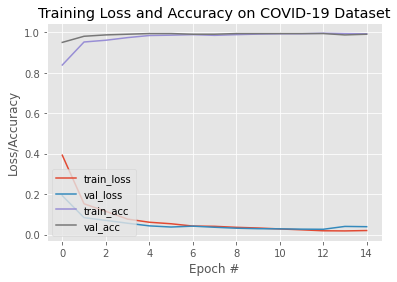

In [ ]:
# plot losses and accuracy

N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on COVID-19 Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.png")

In [ ]:
# save model to disk
print("[INFO] saving COVID-19 detector model...")
model.save("covid19.model", save_format="h5")

[INFO] saving COVID-19 detector model...


In [ ]:
!nvidia-smi

Mon May 18 12:50:22 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   72C    P0    77W / 149W |   8551MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

## TUGAS BESAR 1

Lakukan ulang metode di atas untuk jumlah data training dan testing yang lebih banyak. Anda diperbolehkan untuk menggunakan data sebanyak-banyaknya (tidak terbatas pada data yang diberikan), mengganti metode augmentasi, melakukan tuning hyperparameter, mengganti arsitektur, menggunakan pretrained model lain, dan menentukan performance metric yang menurut anda baik.

Pada folder tugas besar terdapat tiga folder dataset, berikut penjelasan untuk masing-masing folder.

*   sample_dataset: merupakan hasil sampling dari Dr Cohen's Dataset, berisi 25 data x-ray normal dan 25 data x-ray Covid-19.
*   sansten_dataset: merupakan data hasil sampling dari Dr Cohen's Dataset, berisi 102 data x-ray normal, 102 data x-ray bacterial pneumonia, dan 95 data Covid-19.
*   chestimaging_dataset: merupakan data 51 kasus Covid-19, jumlah gambar setiap kasus beragam.

Tidak semua dataset bersih dan dapat langsung digunakan, pastikan untuk mengecek satu-persatu dataset sebelum melakukan training. Misalnya pada dataset yang diberikan terdapat x-ray yang diambil dari penampang lain, terdapat hasil ct scan, dll. Penggunaan dataset yang tidak teratur dapat menurunkan performa model.



Referensi:

Dataset
*   Dr Cohen's Dataset: https://github.com/ieee8023/covid-chestxray-dataset
*   Audrey's Dataset: https://github.com/agchung/Figure1-COVID-chestxray-dataset
*   Kaggle NIH Dataset: https://www.kaggle.com/nih-chest-xrays/data
*   @ChestImaging's Dataset: https://twitter.com/i/status/1243928581983670272
*   COVIDx Dataset: https://github.com/lindawangg/COVID-Net/blob/master/docs/COVIDx.md

Github
*   COVID-Net: https://github.com/lindawangg/COVID-Net

Tutorial (source code tugas ini)
*   https://www.pyimagesearch.com/2020/03/16/detecting-covid-19-in-x-ray-images-with-keras-tensorflow-and-deep-learning/





## TUGAS BESAR 2 (Opsional)

Class Activation Map (CAM) adalah explanation method untuk melihat perilaku dari suatu model. CAM mengambil fitur hasil ekstraksi dari convolution layer dan memvisualisasikan gradien yang didapat dalam bentuk heatmap. Daerah dengan intensitas heatmap tinggi menunjukkan bahwa pada bagian memiliki confidence level yang tinggi untuk diklasifikasikan ke kelas yang bersangkutan. Jika hasil evaluasi menunjukkan akurasi yang bagus, namun heatmap dari CAM menunjukkan lokasi yang salah, berarti model mempelajari fitur yang salah.

Gunakan Class Activation Map atau explanation method lainnya pada model Covid-19, kemudian analisis perilaku model. 


Referensi:

Paper
*   https://arxiv.org/abs/1610.02391

Github
*   https://github.com/insikk/Grad-CAM-tensorflow

Tutorial
*   https://www.pyimagesearch.com/2020/03/09/grad-cam-visualize-class-activation-maps-with-keras-tensorflow-and-deep-learning/

In [ ]:
import sys
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications import imagenet_utils
from google.colab.patches import cv2_imshow
import imutils

sys.path.append('/content/gdrive/My Drive/Tubes DSKC 2020 - Covid19/pyimagesearch/')
from gradcam import GradCAM

In [ ]:
impath = "/content/gdrive/My Drive/Tubes DSKC 2020 - Covid19/dataset_2kelas/normal/NORMAL2-IM-0798-0001.jpeg"

# load the pre-trained CNN from disk
print("[INFO] loading model...")
#model1 = VGG16(weights="imagenet")
model1 = model

# load the original image from disk (in OpenCV format) and then
# resize the image to its target dimensions
orig = cv2.imread(impath)
resized = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB)
resized = cv2.resize(resized, (224, 224))

image = img_to_array(resized)
image = np.expand_dims(image, axis=0)
image = imagenet_utils.preprocess_input(image)

[INFO] loading model...


[0. 1.]
[INFO] normal


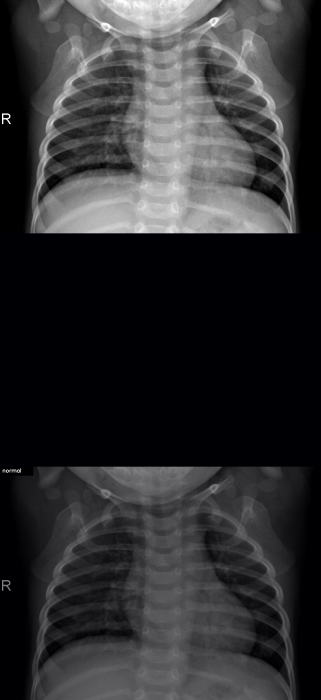

In [ ]:

# use the network to make predictions on the input imag and find
# the class label index with the largest corresponding probability
preds = model1.predict(image)
print(preds[0])
i = np.argmax(preds[0])

# decode the ImageNet predictions to obtain the human-readable label
label = lb.classes_[i]
print("[INFO] {}".format(label))

# initialize our gradient class activation map and build the heatmap
cam = GradCAM(model1, i, layerName='block5_pool')
heatmap = cam.compute_heatmap(image)
# resize the resulting heatmap to the original input image dimensions
# and then overlay heatmap on top of the image
heatmap = cv2.resize(heatmap, (orig.shape[1], orig.shape[0]))
(heatmap, output) = cam.overlay_heatmap(heatmap, orig, alpha=0.5)

# draw the predicted label on the output image
cv2.rectangle(output, (0, 0), (150, 40), (0, 0, 0), -1)
cv2.putText(output, label, (10, 25), cv2.FONT_HERSHEY_SIMPLEX,
	0.8, (255, 255, 255), 2)
# display the original image and resulting heatmap and output image
# to our screen
output = np.vstack([orig, heatmap, output])
output = imutils.resize(output, height=700)
cv2_imshow(output)
#cv2.waitKey(0)